In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Data Loading

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd

import matplotlib.pyplot as plt
import random

In [2]:
training_images = np.load('/content/drive/MyDrive/DeepLearningProject/arrays/new/training_images.npy')
training_gt = np.load('/content/drive/MyDrive/DeepLearningProject/arrays/new/training_gt.npy')
testing_images = np.load('/content/drive/MyDrive/DeepLearningProject/arrays/new/testing_images.npy')
testing_gt = np.load('/content/drive/MyDrive/DeepLearningProject/arrays/new/testing_gt.npy')

In [3]:
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 1

###Model 1

In [4]:
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x/255)(inputs)

In [5]:
#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

In [6]:
#Expansive path
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

In [7]:
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

model1 = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 lambda (Lambda)             (None, 256, 256, 1)          0         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         160       ['lambda[0][0]']              
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                              

In [8]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model1.fit(training_images, training_gt, validation_split=0.1, batch_size=8, epochs=25, callbacks=callbacks)

Epoch 1/25
214/214 [==============================] - 37s 109ms/step - loss: 0.0657 - accuracy: 0.9481 - val_loss: -0.0966 - val_accuracy: 0.9626
Epoch 2/25
214/214 [==============================] - 20s 93ms/step - loss: -0.3420 - accuracy: 0.9628 - val_loss: -0.2286 - val_accuracy: 0.9728
Epoch 3/25
214/214 [==============================] - 20s 92ms/step - loss: -0.4118 - accuracy: 0.9650 - val_loss: -0.2468 - val_accuracy: 0.9701
Epoch 4/25
214/214 [==============================] - 20s 92ms/step - loss: -0.4425 - accuracy: 0.9663 - val_loss: -0.2634 - val_accuracy: 0.9710
Epoch 5/25
214/214 [==============================] - 20s 92ms/step - loss: -0.4331 - accuracy: 0.9662 - val_loss: -0.3085 - val_accuracy: 0.9756
Epoch 6/25
214/214 [==============================] - 20s 92ms/step - loss: -0.4717 - accuracy: 0.9683 - val_loss: -0.3098 - val_accuracy: 0.9761
Epoch 7/25
214/214 [==============================] - 20s 92ms/step - loss: -0.4906 - accuracy: 0.9701 - val_loss: -0.2891 -

In [9]:
train_prediction1 = model1.predict(training_images, verbose=1)
test_prediction1 = model1.predict(testing_images, verbose=1)

17/17 [==============================] - 3s 163ms/step


###Model 2

In [23]:
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x/255)(inputs)

# Contraction path
c1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

c5 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

# Expansive path
u6 = tf.keras.layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

In [24]:
from tensorflow.keras.optimizers import Adam


model2 = tf.keras.Model(inputs=[inputs], outputs=[outputs])

custom_learning_rate = 0.0001
optimizer = Adam(learning_rate=custom_learning_rate)

# Compile the model with the custom learning rate
model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 lambda_2 (Lambda)           (None, 256, 256, 1)          0         ['input_3[0][0]']             
                                                                                                  
 conv2d_38 (Conv2D)          (None, 256, 256, 32)         320       ['lambda_2[0][0]']            
                                                                                                  
 dropout_18 (Dropout)        (None, 256, 256, 32)         0         ['conv2d_38[0][0]']           
                                                                                            

In [25]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model2.fit(training_images, training_gt, validation_split=0.1, batch_size=8, epochs=25, callbacks=callbacks)

Epoch 1/25
214/214 [==============================] - 50s 207ms/step - loss: 0.2167 - accuracy: 0.9455 - val_loss: 0.0758 - val_accuracy: 0.9307
Epoch 2/25
214/214 [==============================] - 43s 201ms/step - loss: -0.2150 - accuracy: 0.9568 - val_loss: -0.1320 - val_accuracy: 0.9615
Epoch 3/25
214/214 [==============================] - 43s 202ms/step - loss: -0.3855 - accuracy: 0.9650 - val_loss: -0.2390 - val_accuracy: 0.9705
Epoch 4/25
214/214 [==============================] - 43s 202ms/step - loss: -0.4309 - accuracy: 0.9666 - val_loss: -0.2377 - val_accuracy: 0.9686
Epoch 5/25
214/214 [==============================] - 43s 201ms/step - loss: -0.4556 - accuracy: 0.9676 - val_loss: -0.2830 - val_accuracy: 0.9736
Epoch 6/25
214/214 [==============================] - 43s 201ms/step - loss: -0.4683 - accuracy: 0.9684 - val_loss: -0.2510 - val_accuracy: 0.9710
Epoch 7/25
214/214 [==============================] - 43s 201ms/step - loss: -0.4834 - accuracy: 0.9698 - val_loss: -0.2

In [26]:
train_prediction2 = model2.predict(training_images, verbose=1)
test_prediction2 = model2.predict(testing_images, verbose=1)

17/17 [==============================] - 6s 396ms/step


###Model 3

In [30]:
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x/255)(inputs)

# Contraction path
c1 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

c5 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

# Expansive path
u6 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

In [31]:
model3 = tf.keras.Model(inputs=[inputs], outputs=[outputs])

custom_learning_rate = 0.0001
optimizer = Adam(learning_rate=custom_learning_rate)

model3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 lambda_3 (Lambda)           (None, 256, 256, 1)          0         ['input_4[0][0]']             
                                                                                                  
 conv2d_57 (Conv2D)          (None, 256, 256, 8)          80        ['lambda_3[0][0]']            
                                                                                                  
 dropout_27 (Dropout)        (None, 256, 256, 8)          0         ['conv2d_57[0][0]']           
                                                                                            

In [35]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model3.fit(training_images, training_gt, validation_split=0.1, batch_size=8, epochs=25, callbacks=callbacks)

Epoch 1/25
214/214 [==============================] - 11s 50ms/step - loss: -0.4229 - accuracy: 0.9665 - val_loss: -0.1670 - val_accuracy: 0.9696
Epoch 2/25
214/214 [==============================] - 10s 48ms/step - loss: -0.4274 - accuracy: 0.9664 - val_loss: -0.2040 - val_accuracy: 0.9700
Epoch 3/25
214/214 [==============================] - 10s 49ms/step - loss: -0.4315 - accuracy: 0.9664 - val_loss: -0.1554 - val_accuracy: 0.9700
Epoch 4/25
214/214 [==============================] - 10s 49ms/step - loss: -0.4379 - accuracy: 0.9666 - val_loss: -0.2521 - val_accuracy: 0.9708
Epoch 5/25
214/214 [==============================] - 10s 49ms/step - loss: -0.4439 - accuracy: 0.9668 - val_loss: -0.2197 - val_accuracy: 0.9704
Epoch 6/25
214/214 [==============================] - 10s 49ms/step - loss: -0.4477 - accuracy: 0.9669 - val_loss: -0.2079 - val_accuracy: 0.9708
Epoch 7/25
214/214 [==============================] - 10s 49ms/step - loss: -0.4540 - accuracy: 0.9675 - val_loss: -0.2079 -

In [36]:
train_prediction3 = model3.predict(training_images, verbose=1)
test_prediction3 = model3.predict(testing_images, verbose=1)

17/17 [==============================] - 0s 29ms/step


###Evaluation

In [10]:
def show_results(idx, images, gt, prediction):

  plt.figure(figsize=(16, 6))

  plt.subplot(1, 3, 1)
  plt.imshow(images[idx])
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.imshow(gt[idx])
  plt.axis('off')

  plt.subplot(1, 3, 3)
  plt.imshow(prediction[idx])
  plt.axis('off')

  plt.show()

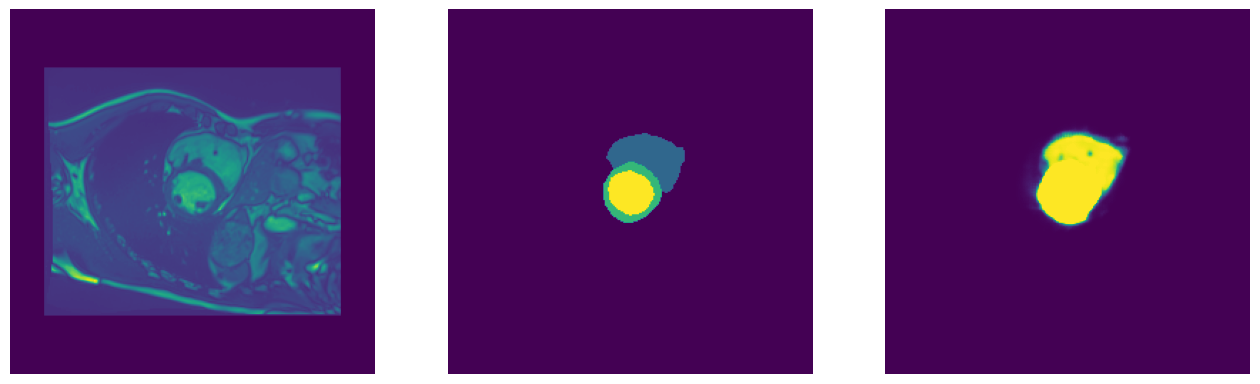

In [13]:
idx = random.randint(0, int(training_images.shape[0]) - 1)
show_results(idx, training_images, training_gt, train_prediction1)

In [11]:
def dice_coef(pred, true):
    intersection = (np.sum(pred[true==3]) * 2.0) + (np.sum(pred[true==2]) * 2.0) + (np.sum(pred[true==1]) * 2.0)
    dice = intersection / (np.sum(pred) + np.sum(true))
    return dice

In [12]:
def plot_results(train_prediction, test_prediction):

  results_train = []
  for pred, true in zip(train_prediction, training_gt):
    results_train.append(dice_coef(pred, true))

  results_test = []
  for pred, true in zip(test_prediction, testing_gt):
    results_test.append(dice_coef(pred, true))

  plt.figure(figsize = (15, 5))
  plt.subplot(1, 2, 1)
  plt.hist(results_train, bins=10, edgecolor='k')
  plt.title('Train, average:{:.3f}'.format(sum(results_train)/len(results_train)))
  plt.subplot(1, 2, 2)
  plt.hist(results_test, bins=10, edgecolor='k')
  plt.title('Test, average:{:.3f}'.format(sum(results_test)/len(results_test)))

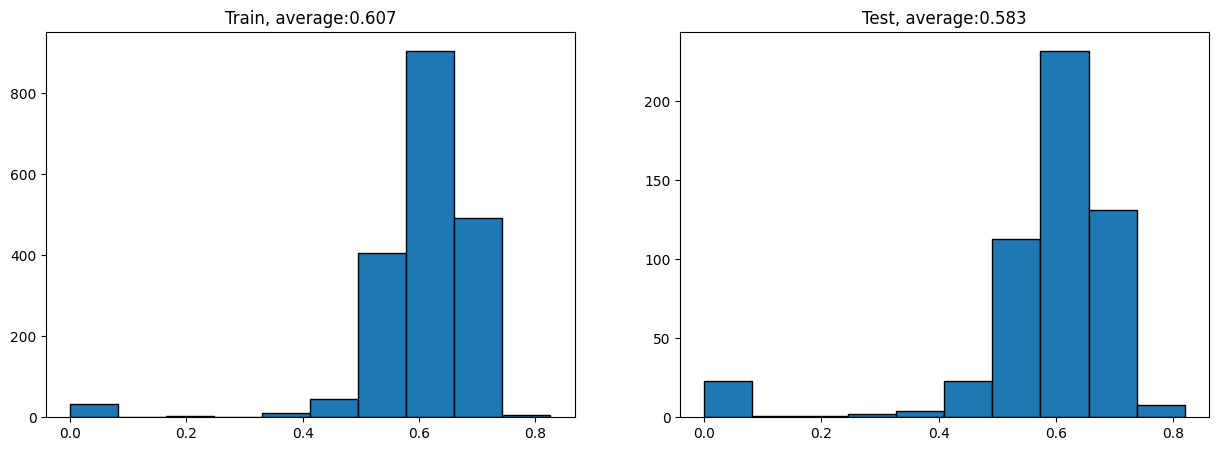

In [13]:
plot_results(train_prediction1, test_prediction1)

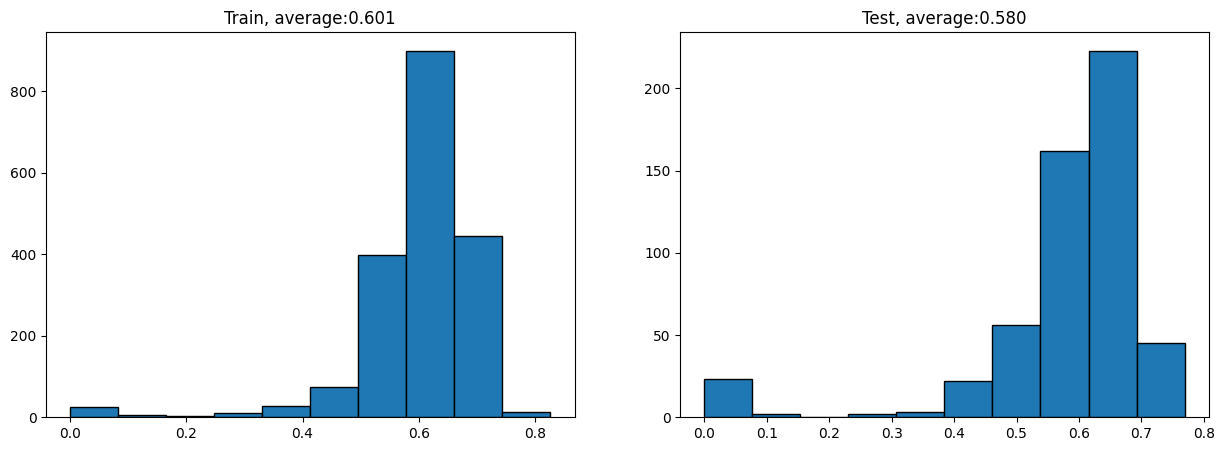

In [27]:
plot_results(train_prediction2, test_prediction2)

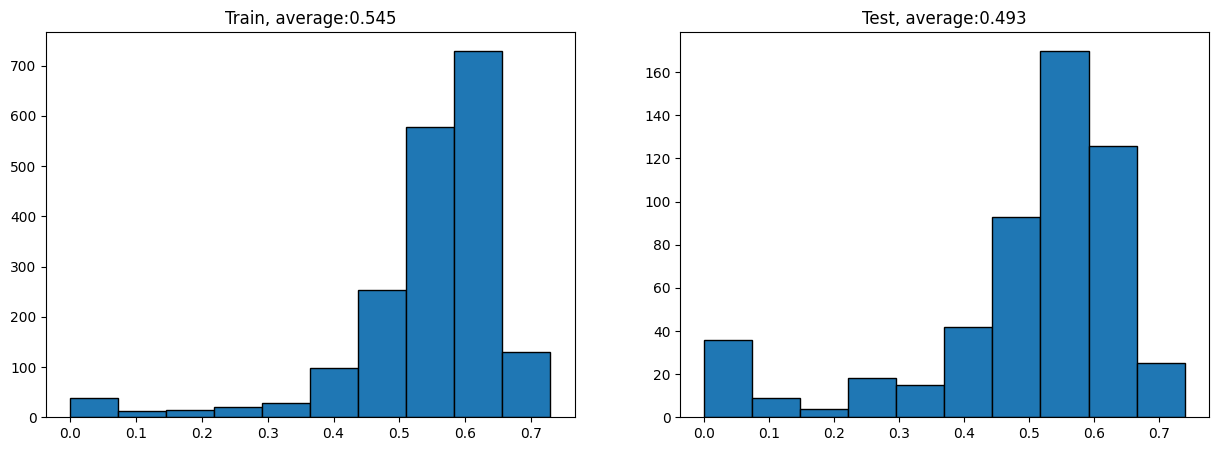

In [37]:
plot_results(train_prediction3, test_prediction3)